In [59]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
train_data=pd.read_csv("C:/Users/Sridhar Reddy/DSCourse/MachineLearning-3/train.csv")


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
round(177/(len(train_data["PassengerId"])),4)


0.1987

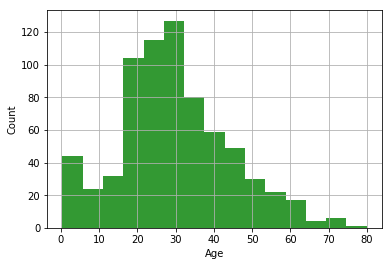

In [7]:
#19.8% of whole data is missed
# Plot the graph for age

ax = train_data["Age"].hist(bins=15, color='green', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [8]:
#lets Fill the data for missing values of Age. As it is Right Skewed lets consider the median

train_data["Age"].median(skipna=True)

28.0

In [9]:
#Fill the age as 28 for all the missing values
train_data["Age"].fillna(28, inplace=True)

In [10]:
#Findout the proportion of missing Cabin value
round(687/(len(train_data["PassengerId"])),4)

0.771

In [11]:
# 77% of the information is missing.. so imputing the values is not the right way ... hence ignoring
train_data.drop("Cabin", axis=1,inplace=True)

In [12]:
#Findout the proportion of missing Embarked value
round(2/(len(train_data["PassengerId"])),4)

0.0022

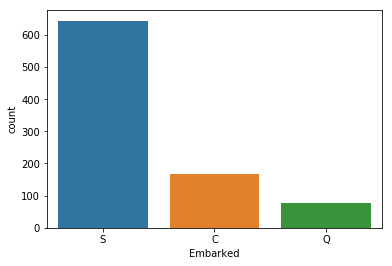

In [13]:
#since only 2 values are missing lets make a count plot for embarked feature 
sns.countplot(train_data["Embarked"])
plt.show();

In [14]:
#here since in the embarked column s is repeated many number of times lets fill na value with s
train_data["Embarked"].fillna('s',inplace=True)

In [15]:
#Create Categorical variable for Train data. No was we have sibsp and parch lets remove the two columns and create a single column 
#stating whether the person has travelled alone or has hje travelled with his buddies

train_data["TravelBuddies"]=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data["TravelBuddies"]>0, 0,1)

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelBuddies,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [17]:
#train_data.drop('SibSp' , axis=1, inplace=True)
train_data.drop('Parch' , axis=1, inplace=True)
train_data.drop('TravelBuddies' , axis=1, inplace=True)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S,1


In [64]:
#create categorical variable for Pclass

train2 = pd.get_dummies(train_data, columns=["Pclass"])
train3 = pd.get_dummies(train2, columns=["Embarked"])
train4 = pd.get_dummies(train3, columns=["Sex"])

In [65]:
train4.head()


,PassengerId,Survived,Name,Age,SibSp,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_s,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,A/5 21171,7.2500,0,0,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,PC 17599,71.2833,0,1,0,0,1,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,113803,53.1000,0,1,0,0,0,0,1,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,373450,8.0500,1,0,0,1,0,0,1,0,0,1


In [66]:
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)

In [67]:
train2.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Ticket,Fare,Embarked,TravelAlone,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S,0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S,1,0,0,1


In [68]:
train3.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_s
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,0,0,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,0,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,0,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,1,0,0,1,0,0,1,0


In [69]:
train4.head()

,Survived,Age,SibSp,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_s,Sex_female,Sex_male
0,0,22.0,1,7.2500,0,0,0,1,0,0,1,0,0,1
1,1,38.0,1,71.2833,0,1,0,0,1,0,0,0,1,0
2,1,26.0,0,7.9250,1,0,0,1,0,0,1,0,1,0
3,1,35.0,1,53.1000,0,1,0,0,0,0,1,0,1,0
4,0,35.0,0,8.0500,1,0,0,1,0,0,1,0,0,1


In [70]:
traindf_final=train4

E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


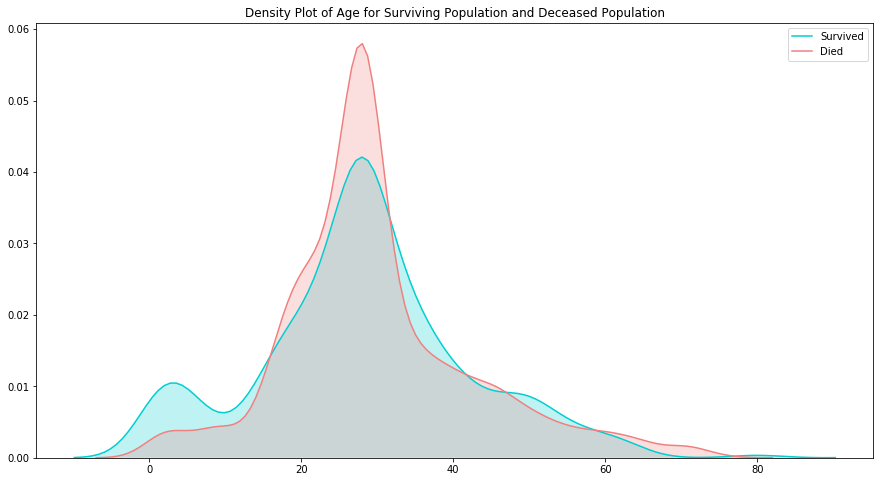

In [71]:
plt.figure(figsize=(15,8))
sns.kdeplot(train_data["Age"][traindf_final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][traindf_final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

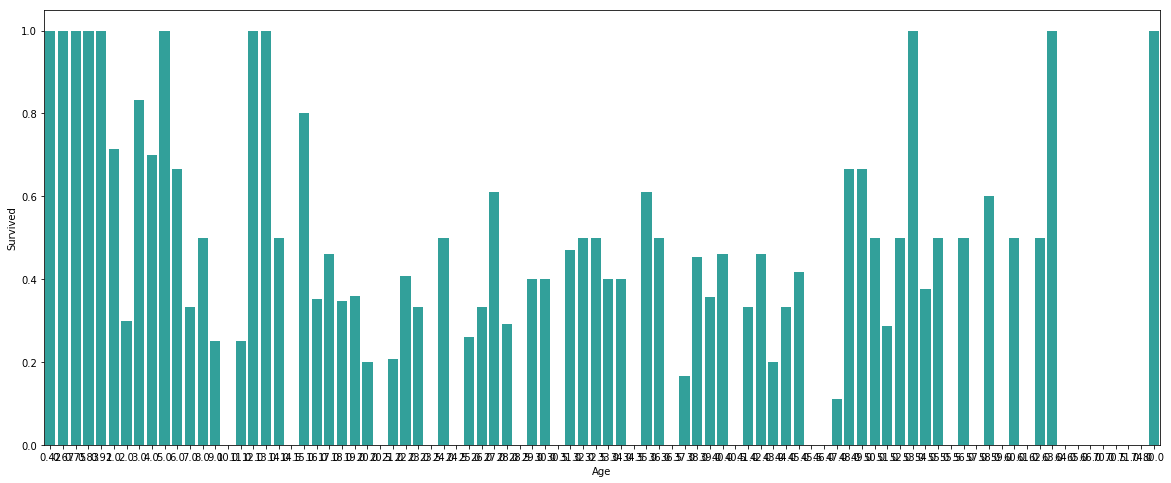

In [72]:
plt.figure(figsize=(20,8))
avg_survival_byage = traindf_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

In [73]:
traindf_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)


E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


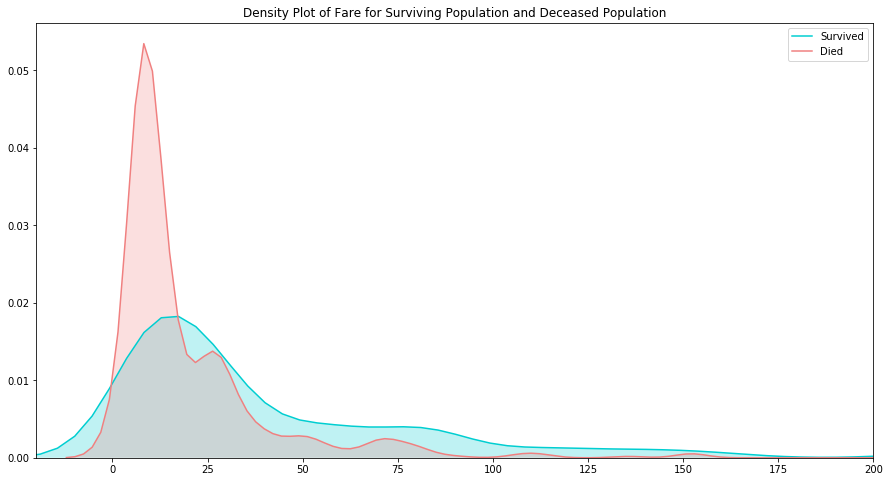

In [74]:
plt.figure(figsize=(15,8))
sns.kdeplot(traindf_final["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(traindf_final["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


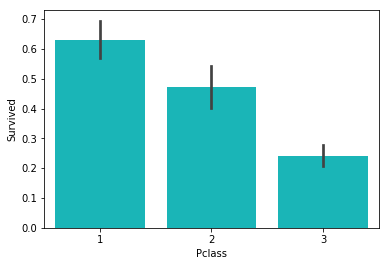

In [75]:
sns.barplot('Pclass', 'Survived', data=train_data, color="darkturquoise")
plt.show()

E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


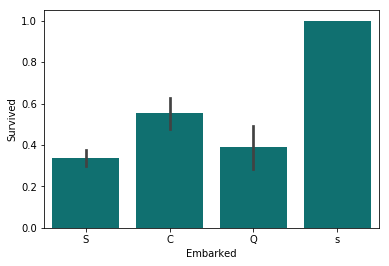

In [76]:
sns.barplot('Embarked', 'Survived', data=train_data, color="teal")
plt.show()

E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


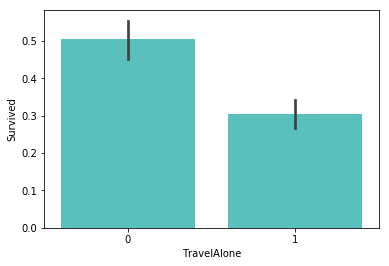

In [77]:
sns.barplot('TravelAlone', 'Survived', data=traindf_final, color="mediumturquoise")
plt.show()


E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


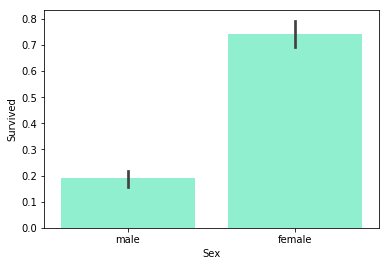

In [78]:
sns.barplot('Sex', 'Survived', data=train_data, color="aquamarine")
plt.show()

In [79]:
traindf_final.head(10)


,Survived,Age,SibSp,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_s,Sex_female,Sex_male,IsMinor
0,0,22.0,1,7.2500,0,0,0,1,0,0,1,0,0,1,0
1,1,38.0,1,71.2833,0,1,0,0,1,0,0,0,1,0,0
2,1,26.0,0,7.9250,1,0,0,1,0,0,1,0,1,0,0
3,1,35.0,1,53.1000,0,1,0,0,0,0,1,0,1,0,0
4,0,35.0,0,8.0500,1,0,0,1,0,0,1,0,0,1,0
5,0,28.0,0,8.4583,1,0,0,1,0,1,0,0,0,1,0
6,0,54.0,0,51.8625,1,1,0,0,0,0,1,0,0,1,0
7,0,2.0,3,21.0750,0,0,0,1,0,0,1,0,0,1,1
8,1,27.0,0,11.1333,0,0,0,1,0,0,1,0,1,0,0
9,1,14.0,1,30.0708,0,0,1,0,1,0,0,0,1,0,1


In [84]:
X=traindf_final[['Age','SibSp','Fare','Embarked_C','Embarked_Q','Embarked_S','TravelAlone','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','IsMinor']]
y=traindf_final['Survived']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
traindf_final

,Survived,Age,SibSp,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_s,Sex_female,Sex_male,IsMinor
0,0,22.0,1,7.2500,0,0,0,1,0,0,1,0,0,1,0
1,1,38.0,1,71.2833,0,1,0,0,1,0,0,0,1,0,0
2,1,26.0,0,7.9250,1,0,0,1,0,0,1,0,1,0,0
3,1,35.0,1,53.1000,0,1,0,0,0,0,1,0,1,0,0
4,0,35.0,0,8.0500,1,0,0,1,0,0,1,0,0,1,0
5,0,28.0,0,8.4583,1,0,0,1,0,1,0,0,0,1,0
6,0,54.0,0,51.8625,1,1,0,0,0,0,1,0,0,1,0
7,0,2.0,3,21.0750,0,0,0,1,0,0,1,0,0,1,1
8,1,27.0,0,11.1333,0,0,0,1,0,0,1,0,1,0,0
9,1,14.0,1,30.0708,0,0,1,0,1,0,0,0,1,0,1
